# A Demostration of Good and Bad Datasets
## For Multiclass Classification

First, import the libraries we'll be using

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
import logging
import seaborn as sns

logging.getLogger("tensorflow").setLevel(logging.ERROR)#ignores annoying errors

Let's start with a 'bad' dataset. What defines as a 'bad' dataset in terms of multiclass classification is the lack of clustering. We'll show what we mean by this later. For now, let's load up the first csv sheet, 'bodyPerformance.csv'. This is a datasheet where participants were given a 'class' based on their performance, with D being the lowest class and A being the highest grade.
Datasheets are rather large, so please be patient.

In [11]:
df = pd.read_csv("bodyPerformance.csv", usecols=['age','gender','gripForce', 'sit and bend forward_cm', 'sit-ups counts','broad jump_cm', 'class'])

In this sheet, we'll be using the 7 columns as previously mentioned. The first 6 will be our inputs, and the last column, class, will be the output.

A good first step is always read the head to see what we're going at

In [5]:
df.head()


,age,gender,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,54.9,18.4,60.0,217.0,C
1,25.0,M,36.4,16.3,53.0,229.0,A
2,31.0,M,44.8,12.0,49.0,181.0,C
3,32.0,M,41.4,15.2,53.0,219.0,B
4,28.0,M,43.5,27.1,45.0,217.0,B


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   gripForce                13393 non-null  float64
 3   sit and bend forward_cm  13393 non-null  float64
 4   sit-ups counts           13393 non-null  float64
 5   broad jump_cm            13393 non-null  float64
 6   class                    13393 non-null  object 
dtypes: float64(5), object(2)
memory usage: 732.6+ KB


Gender is being defined as M for males, and F for Females. Let's make it so that 0 stands for females and 1 stands for males instead.
Also, while we're at let, let's use a LabelEncoder to give a number for class.

In [12]:
df['gender'] = df['gender'].replace({'F': 0, 'M': 1}).astype('float64')
#Give each class a unique variable
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  float64
 2   gripForce                13393 non-null  float64
 3   sit and bend forward_cm  13393 non-null  float64
 4   sit-ups counts           13393 non-null  float64
 5   broad jump_cm            13393 non-null  float64
 6   class                    13393 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 680.2 KB


Let's create our testing sets

In [13]:
X = df.drop('class', axis=1)#X, our input features
Y = df['class'] #Y, our output
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2) #Put 20% of our rows into the tr

And create our model with Tensorflow
This will take a few minutes, please take a coffee and come back

In [17]:
model = Sequential([
   Input(shape=(6,)),
    Dense(6, activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=100, batch_size=5, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/100
2143/2143 [==============================] - 7s 2ms/step - loss: 14.1136 - accuracy: 0.2834 - val_loss: 1.4369 - val_accuracy: 0.3128
Epoch 2/100
2143/2143 [==============================] - 5s 2ms/step - loss: 1.3157 - accuracy: 0.3390 - val_loss: 1.2355 - val_accuracy: 0.3725
Epoch 3/100
2143/2143 [==============================] - 5s 2ms/step - loss: 1.2136 - accuracy: 0.4094 - val_loss: 1.1555 - val_accuracy: 0.4483
Epoch 4/100
2143/2143 [==============================] - 5s 2ms/step - loss: 1.1606 - accuracy: 0.4503 - val_loss: 1.1169 - val_accuracy: 0.4774
Epoch 5/100
 880/2143 [===========>..................] - ETA: 2s - loss: 1.1220 - accuracy: 0.4800

KeyboardInterrupt: 

No doubt you'll end with a low score, most likely around an accuracy of .64.
Why is this? The data is bad. To show this, let's use matplotlib to see what it is we're actually looking at by using a scatterplot
# Plotting Data to Determine Reliability

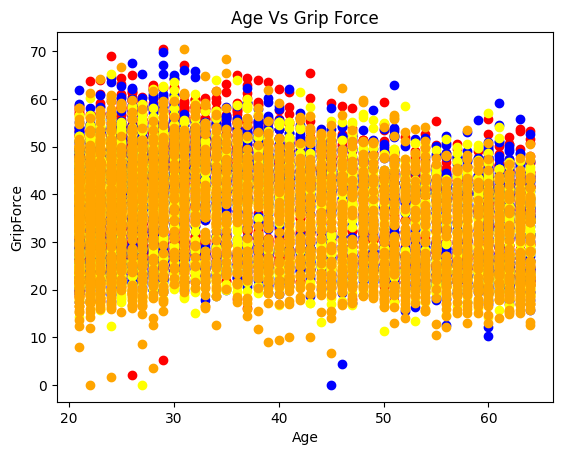

In [26]:
colors = ['red','blue', 'yellow', 'orange']
classes = [0,1,2,3]
#assigns each class a color and use 1 feature as x and another feature as y to plot that point
for i in range(4):
    x = df[df['class']==classes[i]]
    plt.scatter(x['age'],x['gripForce'],c=colors[i], label = classes[i])
    plt.xlabel('Age')
    plt.ylabel('GripForce')
    plt.title('Age Vs Grip Force')



Quite a colorful display, isn't it? From this, we can tell that the there is no pattern between classes and grip force. As in, someone with a high grip power can have an A class and someone with a low grip power can also have a high grip power. Let's make some more graphs to show this is not just a fluke

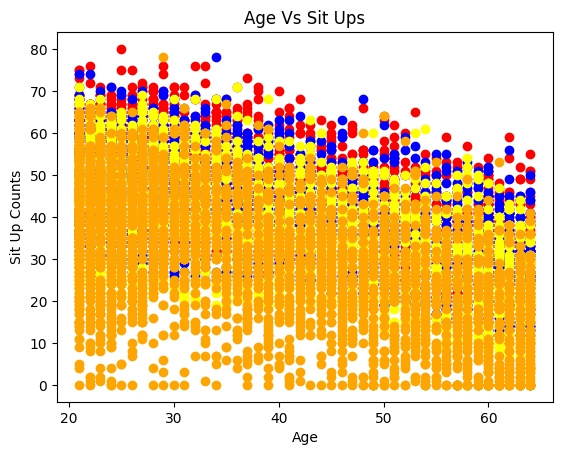

In [27]:
for i in range(4):
    x = df[df['class']==classes[i]]
    plt.scatter(x['age'],x['sit-ups counts'],c=colors[i], label = classes[i])
    plt.xlabel('Age')
    plt.ylabel('Sit Up Counts')
    plt.title('Age Vs Sit Ups')

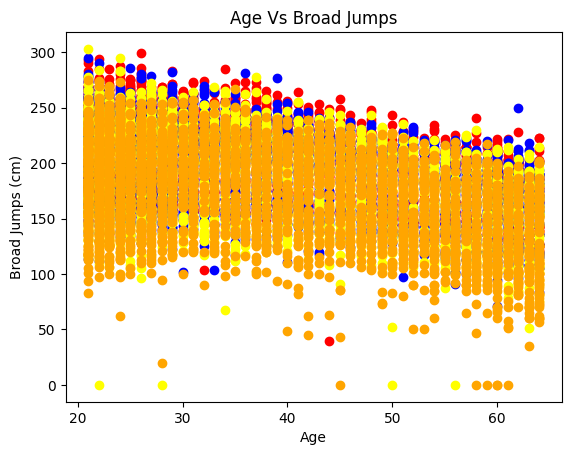

In [29]:
for i in range(4):
    x = df[df['class']==classes[i]]
    plt.scatter(x['age'],x['broad jump_cm'],c=colors[i], label = classes[i])
    plt.xlabel('Age')
    plt.ylabel('Broad Jumps (cm)')
    plt.title('Age Vs Broad Jumps')

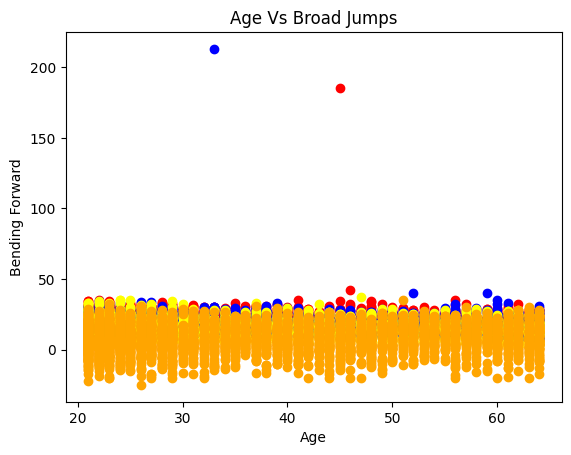

In [30]:
for i in range(4):
    x = df[df['class']==classes[i]]
    plt.scatter(x['age'],x['sit and bend forward_cm'],c=colors[i], label = classes[i])
    plt.xlabel('Age')
    plt.ylabel('Bending Forward')
    plt.title('Age Vs Broad Jumps')

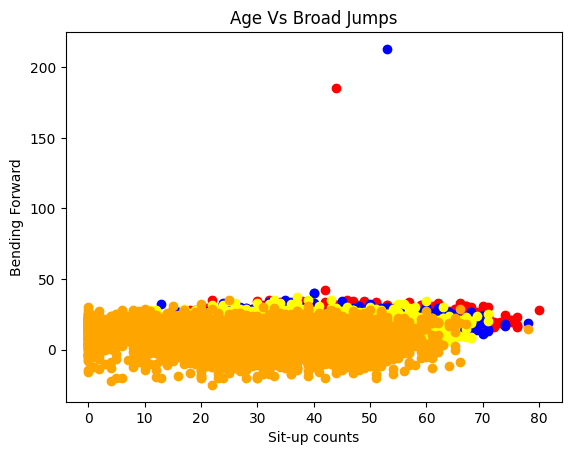

In [31]:
for i in range(4):
    x = df[df['class']==classes[i]]
    plt.scatter(x['sit-ups counts'],x['sit and bend forward_cm'],c=colors[i], label = classes[i])
    plt.xlabel('Sit-up counts')
    plt.ylabel('Bending Forward')
    plt.title('Sit-ups Vs Broad Jumps')

C:\Users\Grant\AppData\Local\Temp\ipykernel_18268\3048952738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

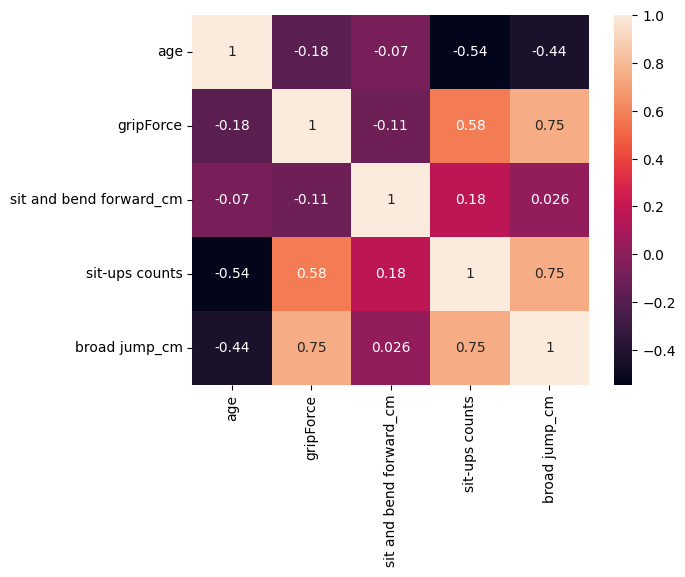

In [12]:
corr = df.corr()
sns.heatmap(corr,annot=True)

As you can see, there almost no clustering. There is a small amount of clustering when it comes to sit-ups vs age and situps vs jumps where reds (A class) performs slighty better and oranges (B class) performing poorly. However, these clusters are overlapping with one another, which is why this is a bad dataset for the purposes of multiclass classification. Without distinct clusters, a neural network can only guess what the class of a human is just as well as... well, a human.

The reason on why there is no distinct clustering is because human performance can be chaotic. For example, a 40 year old man can have high situps and jumps while a 20 year old can have low returns in these columns. Another good example is that a participant can jump poorly while having outstanding bending and situps, qualifying him as an A class. It could also be argue is that there is simply just too much data for the purposes of multiclass classification. Finally, the definition of what counts as an 'A' class is subjective, and the grading could differ between tester to tester.

# A Good DataSet
Let's use a different Dataset for multiclass classification. This is the IRIS dataset, where flower measurements and their species is recorded. This dataset is famous among machine learning.

In [20]:
df = pd.read_csv("IRIS.csv", usecols=['sepal_length','sepal_width','petal_length','petal_width','species'])

A good start is to look at the head and info

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now let's draw some scatterplot to visual see the clusters

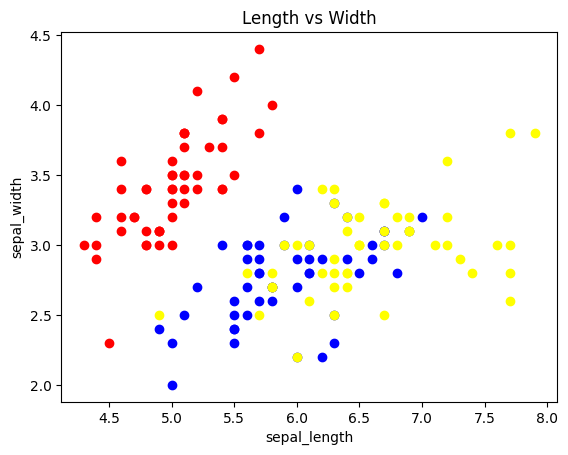

In [7]:
colors = ['red','blue', 'yellow']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x = df[df['species']==classes[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i], label = classes[i])
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.title('Sepal Length and Width')

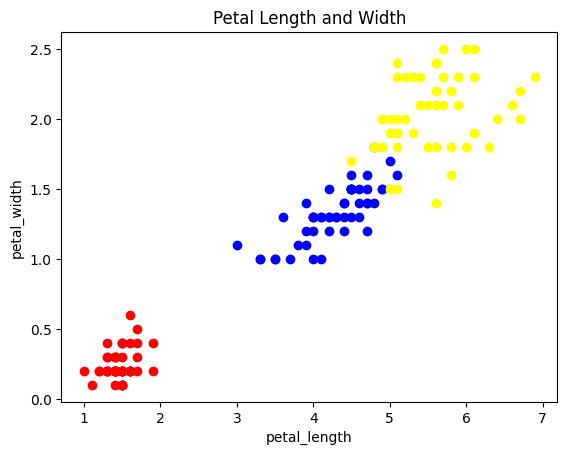

In [8]:
for i in range(3):
    x = df[df['species']==classes[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i], label = classes[i])
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.title('Petal Length and Width')

C:\Users\Grant\AppData\Local\Temp\ipykernel_18268\3048952738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

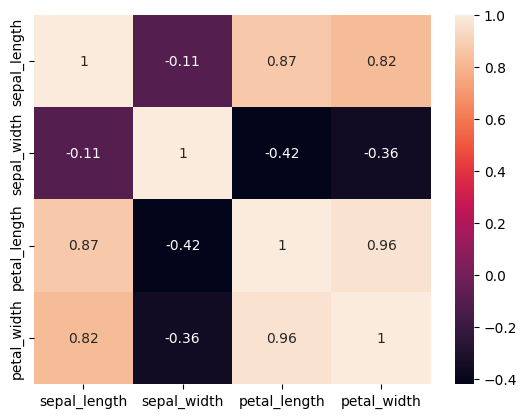

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True)

From the above graphs, it would appear that the pedal measurements have almost distinct clustering, with the sepal measurements being close to distinct. For example, 'Iris-setosa' has small pedals,'Iris-versicolor' typically have medium pedals,and 'Iris-virginica' typically have longer pedals.

Let's make a neural network using these 4 features as inputs and species as an output

In [21]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
X = df.drop('species', axis=1)
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

model = Sequential([
   Input(shape=(4,)),
    Dense(4, activation='relu'),
    Dense(3,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=100, batch_size=5, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 1.9023 - accuracy: 0.3583 - val_loss: 1.9461 - val_accuracy: 0.2333
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.6039 - accuracy: 0.3583 - val_loss: 1.7153 - val_accuracy: 0.2333
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 1.4625 - accuracy: 0.3583 - val_loss: 1.5654 - val_accuracy: 0.2333
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 1.3575 - accuracy: 0.3583 - val_loss: 1.4489 - val_accuracy: 0.2333
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2743 - accuracy: 0.3583 - val_loss: 1.3560 - val_accuracy: 0.2333
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 1.2089 - accuracy: 0.3583 - val_loss: 1.2800 - val_accuracy: 0.2333
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1519 - accuracy: 0.3583 - val_loss: 1.2249 - val_accuracy: 0.2333
Epoch 8/100


In [22]:
predictions = model.predict(X_test)
decoded_predictions = le.inverse_transform(np.argmax(predictions, axis=1))
print("Predictions:")
print(decoded_predictions[:10])


1/1 [==============================] - 0s 87ms/step
Predictions:
['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


No doubt this will yield better results. This dataset is clearly better. If this was any additional data added to this dataset, the accuracy would most likely be the same because there are some strong correrlation, as demostrated in the heatmap.

# Realism

Having distinct clusters drawn from csv sheets is rare to obtain. Outside of species determination, getting high-quality datasheet for multiclass classification is almost impossible to obtain.
## Recommendations
For sheets such as bodyPerformance, it is recommended to just have a sigmoid output layer (i.e is the participant going to be an A class?).
Use images instead, there is a lot more image dataset then there are text-based dataset with a lot more variety.

# Conclusion

The purpose of this project is to show how to know if you're dataset is good or not for the purposes of multiclass classification. Researchers can spend weeks trying to improve datasets without first analyzing the dataset to see if the data is good. For machine learning, having good data is always important, but for multiclass classification, your project will go no where if there is no distinct clustering.